# Ford used car analysis

Submitted by:
<br>Nabila Tajrin Bristy
<br>Dhaka, Bangladesh

#### Objective
This project visualizes the data and analyzes the relationship between different data of used Ford cars.

#### Variables
Model, year, price, transmission, mileage, fuelType, mpg, and engineSize.

#### The data has been visualized using:
Barplot, histogram, ECDF etc.

#### Tasks:
- Create a figure of barplot that will contain multiple subplots. Each subplot will represent a column.
- Make sure you have a proper title, xlabel, ylabel, xticks, yticks, and figure size which will represent an example of good data visualization.
- Use the Markdown cell for proper commenting and make sure the code easily understandable. Use the .head() or .tail() method when necessary rather than displaying all the rows in the dataframe.
- Make sure your code is reusable and reproducible. 

#### References:
- Dataset source: https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

### Import required libraries and packages

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')
set_color = sns.color_palette('Set2')

### Reading CSV file

In [72]:
# read the ford.csv file 
df = pd.read_csv("ford.csv")

# check the first 5 rows
display(df.head())

# check the last 5 rows
display(df.tail())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
17959,Fiesta,2016,7999,Manual,31348,Petrol,54.3,1.2
17960,B-MAX,2017,8999,Manual,16700,Petrol,47.1,1.4
17961,B-MAX,2014,7499,Manual,40700,Petrol,57.7,1.0
17962,Focus,2015,9999,Manual,7010,Diesel,67.3,1.6
17963,KA,2018,8299,Manual,5007,Petrol,57.7,1.2


### Function to count the number of observation for unique value in a column of Dataframe

In [73]:
#Declare reusable function

def unique_val_count(date, column):
    #count unique values in each column of the dataframe
    df_count = df[column].value_counts()
    
    #create separate dataframes of the columns
    df_count = pd.DataFrame(df_count)
    
    #reset the names of the columns to 'index'
    df_count = df_count.reset_index()
    
    #change the name of column name
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    
    #finding the % of cars for each column/dataframe
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100),2)#2 digits after the decimal point of a float.
    
    return df_count

### Get the number of observation for unique value in a column of Dataframe

In [74]:
#Initiating new dataframes with the four columns of main dataframe 'Ford'
model_count = unique_val_count(df, 'model')
year_count = unique_val_count(df, 'year')
transmission_count = unique_val_count(df, 'transmission')
fueltype_count = unique_val_count(df, 'fuelType')

In [75]:
#Sorting dataframe year_count in ascending order
year_count = year_count.sort_values(by = 'year')
year_count

,year,No_of_cars,% of cars
19,1996,1,0.01
20,1998,1,0.01
21,2000,1,0.01
18,2002,3,0.02
17,2003,3,0.02
16,2004,4,0.02
14,2005,16,0.09
15,2006,13,0.07
13,2007,32,0.18
12,2008,57,0.32


### Function to get the number of observation for each unique value in a column using a barplot

Data is the naming of dataframe<br>
Column_x will be in the x axis<br>
Rotation will rotate the labels if required<br>
Yticks is the range/bins/class-intervals of y axis<br>

In [76]:
#Creating barplots using seaborn
 def barplot(data, column_x, color, rotation, yticks):
        sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
        
        plt.title('Percentage of cars present for each ' + column_x)
        plt.xlabel(column_x)
        plt.ylabel('Percent of Cars (%)')
        
        #It will rotate if required
        plt.xticks(rotation=rotation)
        
        #yticks will be different for each dataframes
        plt.yticks(yticks)

### Creating the subplots

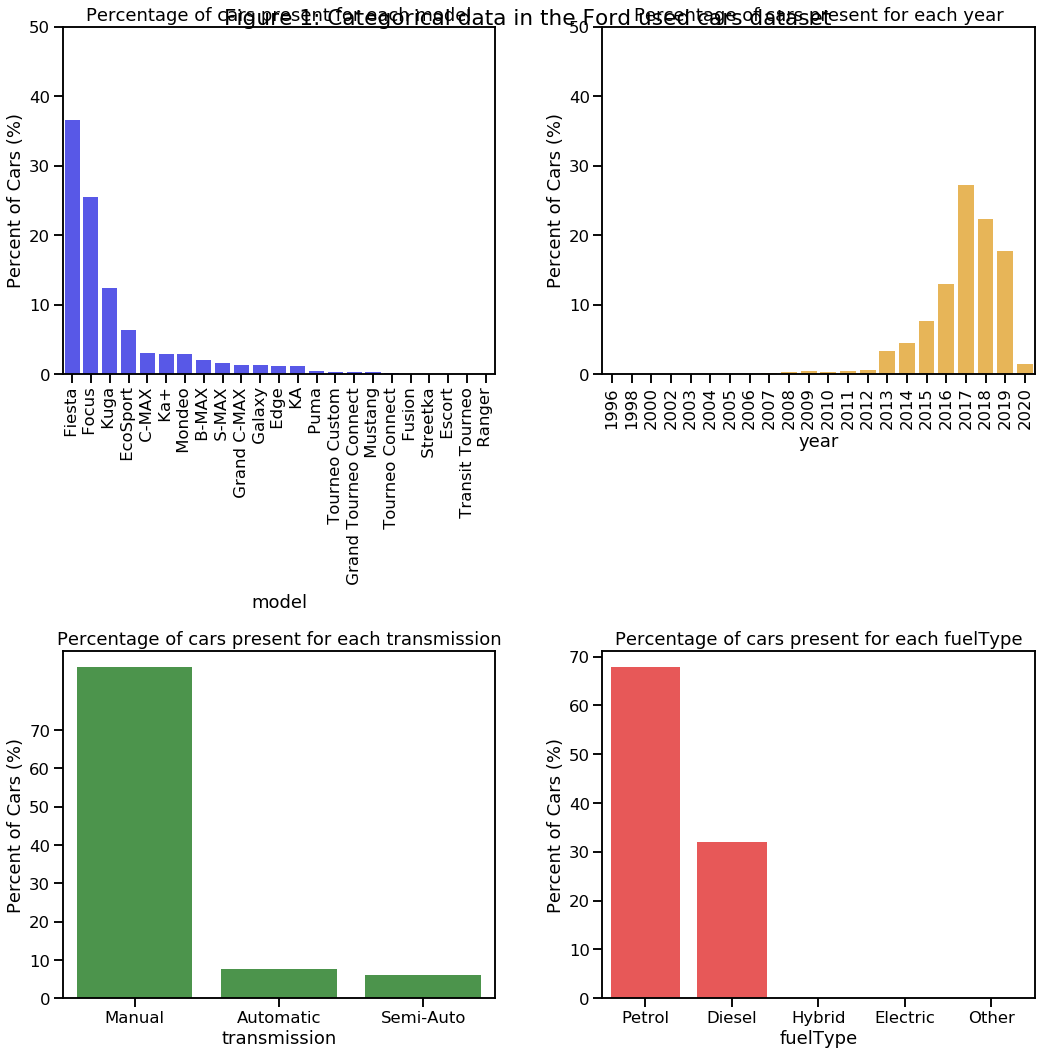

In [77]:
#Setting the size of the graphs.
plt.figure(figsize=(15,15))

#Creating subplots
#Combining multiple graphs and show them together. Using rows and columns numbers based on the graphs 
#placement on the figure to position them correctly. There will be 4 graphs in 2 rows and 2 columns.
#Creating barplot
#barplot(data, column_x, color, rotation, yticks)
#Where,
#data= Dataframe/ model_count
#column_x will be in the x axis
#yticks is the range/bins/class-intervals of y axis


#Subplot 'model': position 1 (1st row, 1st column)
plt.subplot(2,2,1)
barplot(model_count, 'model', 'blue', 90, np.arange(0,51,10))

#Subplot 'year': position 2 (1st row, 2nd column)
plt.subplot(2,2,2)
barplot(year_count, 'year', 'orange', 90, np.arange(0,51,10))

#Subplot 'transmission': position 3 (2nd row, 1st column)
plt.subplot(2,2,3)
barplot(transmission_count, 'transmission', 'green', 0, np.arange(0,71,10))

#Subplot 'fuelType': position 4 (2nd row, 2nd column)
plt.subplot(2,2,4)
barplot(fueltype_count, 'fuelType', 'red', 0, np.arange(0,71,10))

#set title
plt.suptitle('Figure 1: Categorical data in the Ford used cars dataset')

#ignoring overlapping of the texts among graphs
plt.tight_layout()
plt.show()

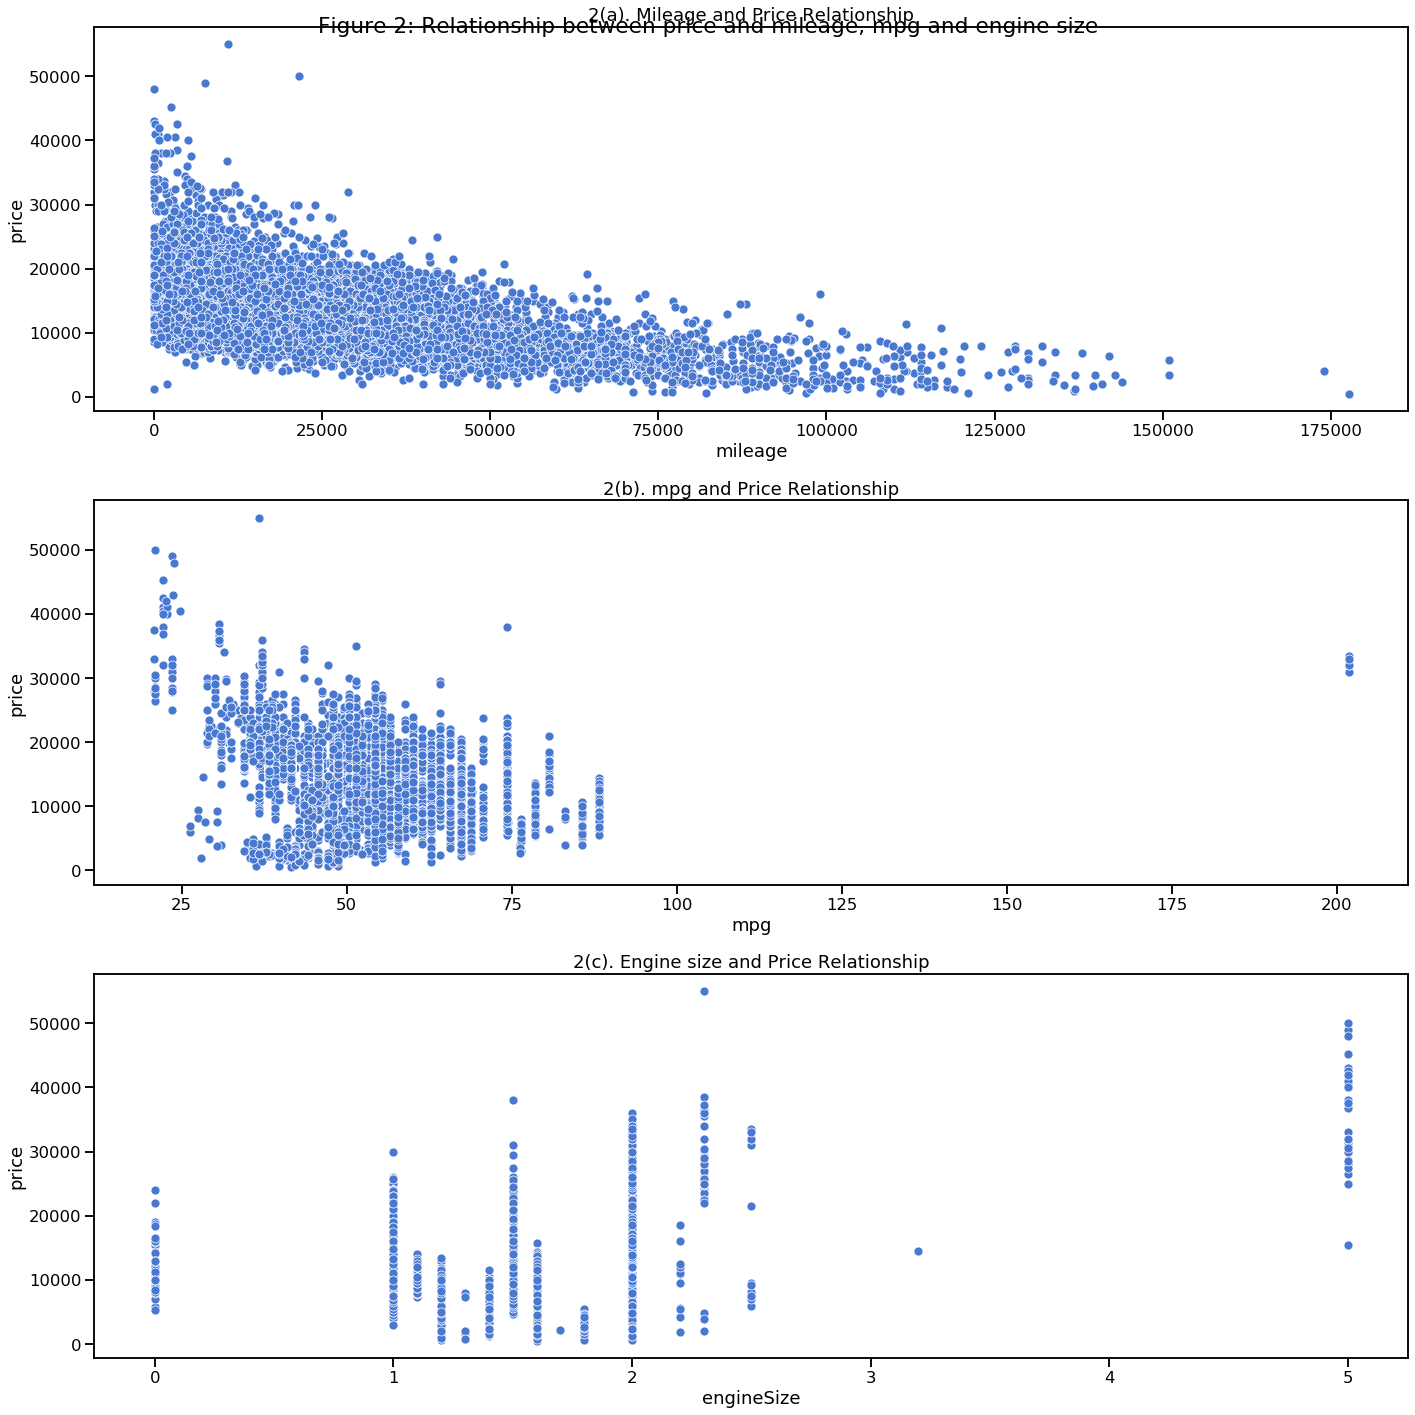

In [78]:
sns.set_context('talk')
#Setting the size of the graph (width, length/height)
plt.figure(figsize=(20,20))

#Creating scatterplot with seaborn
plt.subplot(3,1,1)
sns.scatterplot(x='mileage',y='price',data=df)
plt.title('2(a). Mileage and Price Relationship')

plt.subplot(3,1,2)
sns.scatterplot(x='mpg',y='price',data=df)
plt.title('2(b). mpg and Price Relationship')

plt.subplot(3,1,3)
sns.scatterplot(x='engineSize',y='price',data=df)
plt.title('2(c). Engine size and Price Relationship')

plt.suptitle('Figure 2: Relationship between price and mileage, mpg and engine size')

plt.tight_layout()
plt.show()

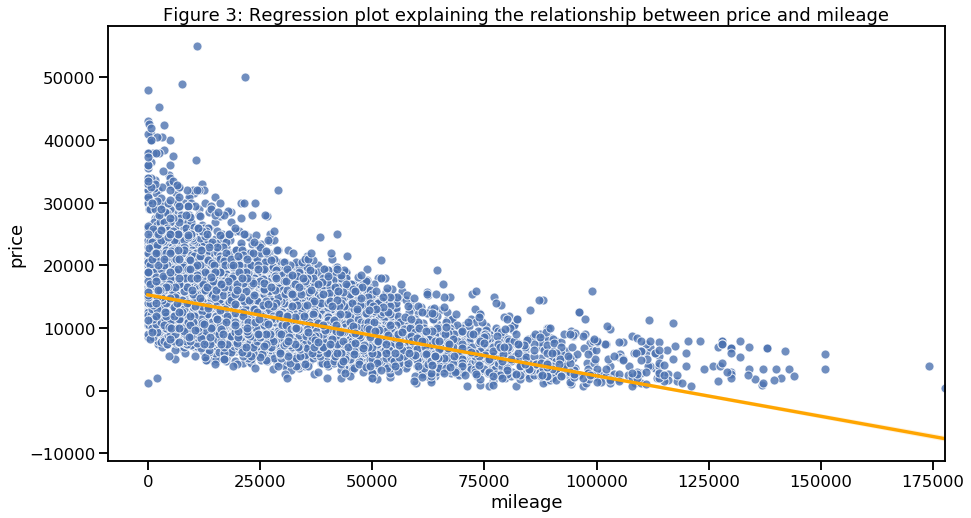

In [79]:
#Changing the color palette of the figures.
sns.set_palette('deep')

plt.figure(figsize=(15,8))
sns.regplot(x='mileage', y='price', data=df, scatter_kws={'edgecolor':'white'}, line_kws={'color':'orange'})

plt.title('Figure 3: Regression plot explaining the relationship between price and mileage')
plt.show()

Here,<br>
Mileage in x-axis is independent variable. x-axis is for domain.<br>
Price in y-axis is dependent variable. y-axis is for range.

The price which is a dependent variable, changes with mileage. The trend shows that as mileage increases, the value of the used Ford cars decreases.
In Fig 3 the price represents a negative value at extreme cases of mileage. After certain milage the used Ford cars holds no values.
All of the above trends show changes in price due to changes in mileage.

### Subplot of mileage and price<br>
Checking the subplot of mileage and price as we couldn't determine any pattern from the subplots of Price and mpg or Price and engineSize.

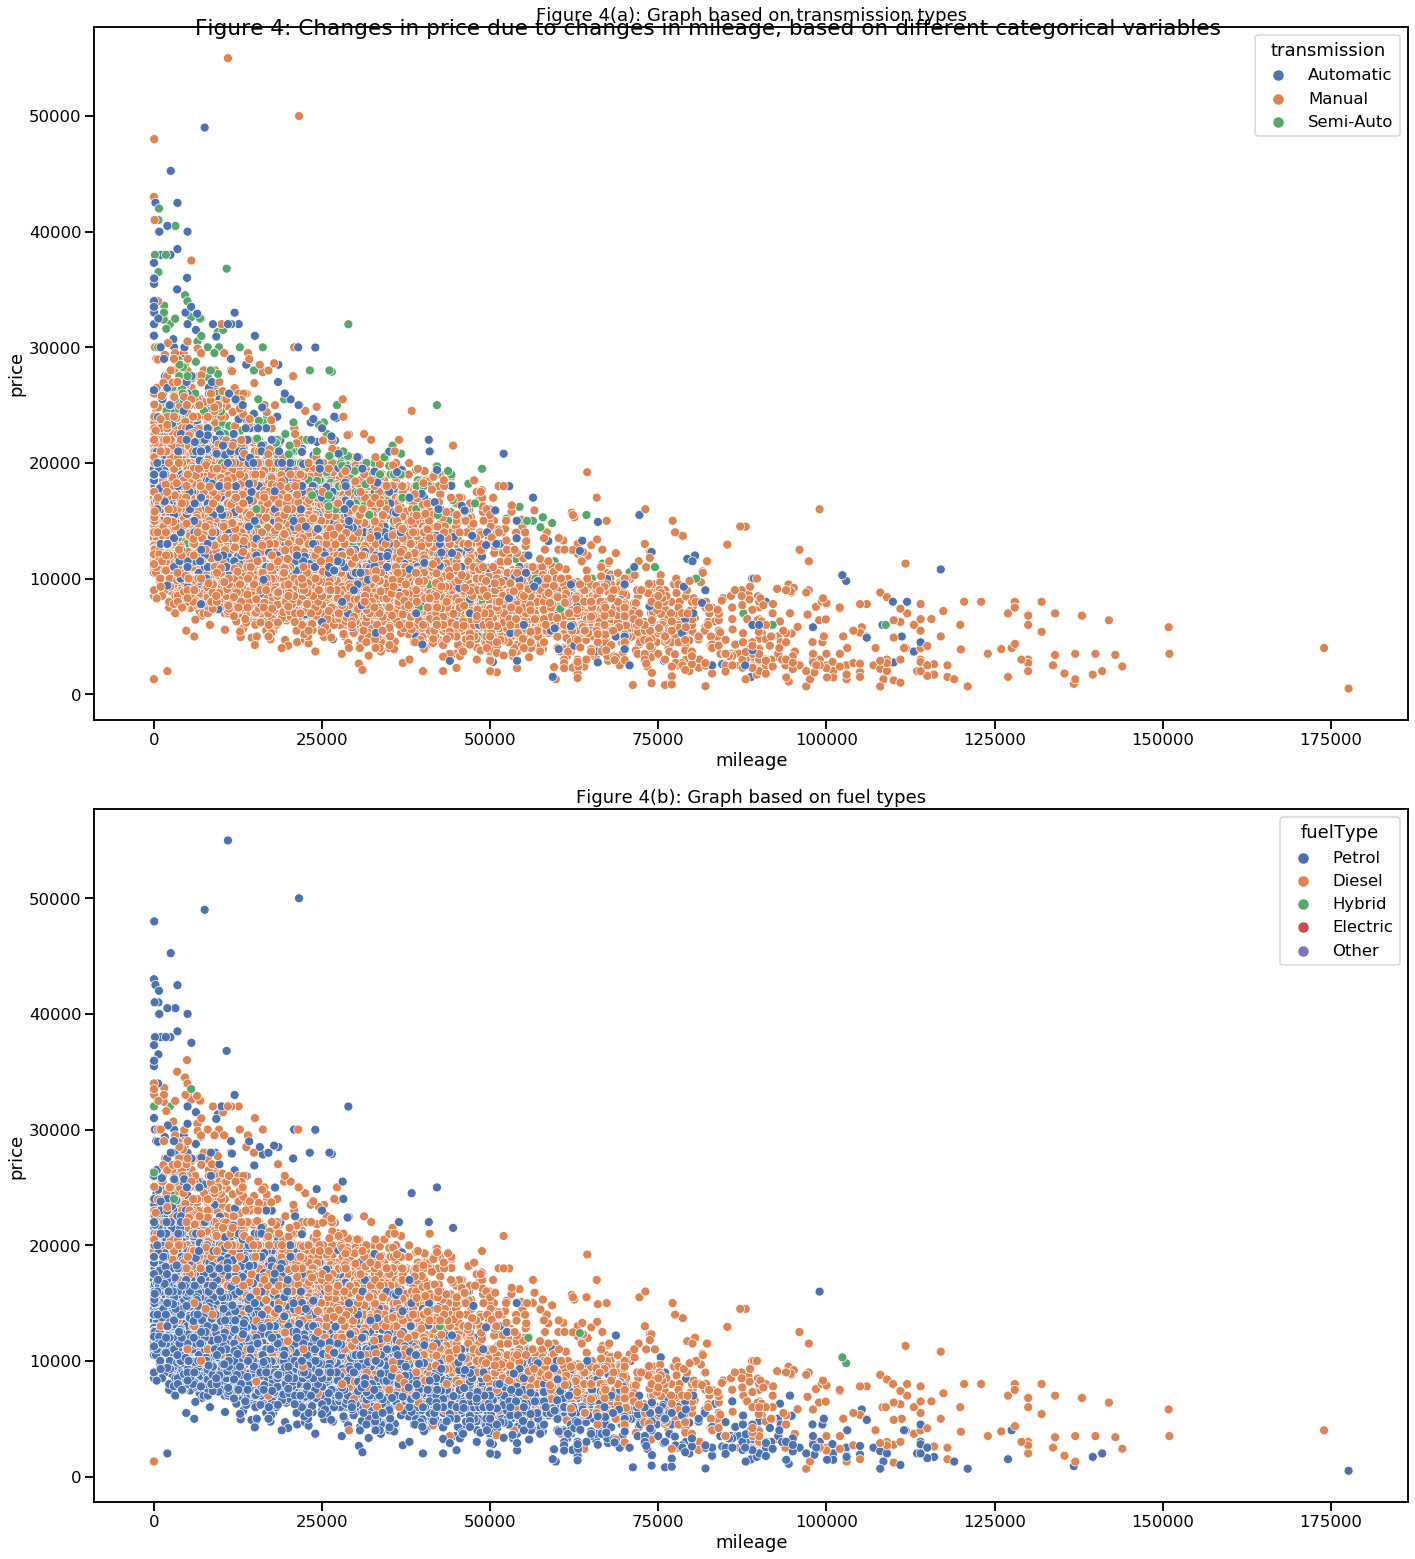

In [80]:
plt.figure(figsize=(20,22))
sns.set_palette("deep")

plt.subplot(2,1,1) #position 1 = 1st row, 1st column
sns.scatterplot(x='mileage', y='price', data=df, hue='transmission')
plt.title('Figure 4(a): Graph based on transmission types')

plt.subplot(2,1,2) #position 2 = 1st row, 2nd column
sns.scatterplot(x='mileage', y='price', data=df, hue='fuelType')
plt.title('Figure 4(b): Graph based on fuel types')

plt.suptitle('Figure 4: Changes in price due to changes in mileage, based on different categorical variables')

plt.tight_layout()
plt.show()

Figure 4 doesn't show noteworthy relationship. There's a similarity in pattern/trend among all the categorical variables. However, Figure 4(C) uses many categories which makes the graph abstruse.

#### Findings:
-On the subplot Transmission the price of the Manual cars are lowest except for a few outliers, Automatic cars and semi-auto cars prices are higher.<br>
-On the subplot fuelType the price of the petrol cars are usually lowest then Diesesl cars along with Hybrid cars with Electric cars except for a few outliers.<br> 
-Other cars data aren't quite visible since their data sample is low.

### Histogram subplot of all the numeric columns of the dataframe

/home/iit/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/iit/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/iit/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/iit/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/iit/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


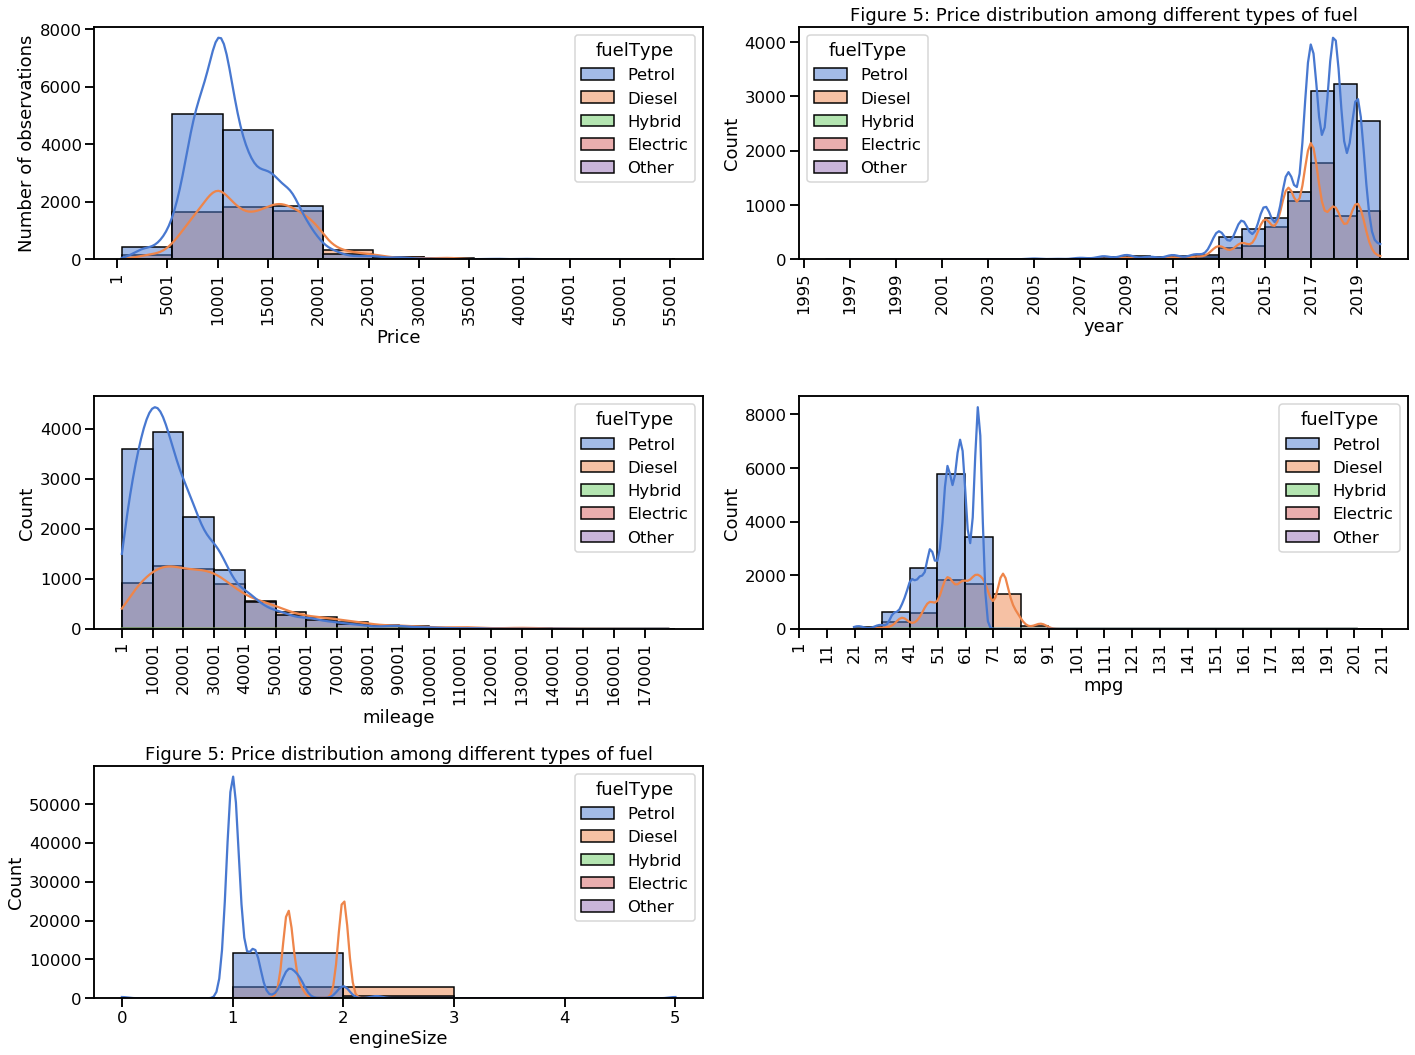

In [83]:
sns.set_palette('muted')
plt.figure(figsize=(20,15))

#subplot of price (position 1: 1st row, 1st column)
plt.subplot(3,2,1)
sns.histplot(data=df, x='price', binwidth=5000, kde=True, hue='fuelType', color=set_color[0])
plt.xticks(np.arange(1,56001,5000),rotation=90)
plt.xlabel('Price')
plt.ylabel('Number of observations')
plt.title('Figure 5(a): Price distribution among different types of fuel')

#subplot of year (position 2: 1st row, 2nd column)
plt.subplot(3,2,2)
sns.histplot(data=df, x='year', binwidth=1, kde=True, hue='fuelType', color=set_color[1])
plt.xticks(np.arange(1995,2021,2),rotation=90)
plt.title('Figure 5: Price distribution among different types of fuel')

#subplot of mileage (position 3: 2nd row, 1st column)
plt.subplot(3,2,3)
sns.histplot(data=df, x='mileage', binwidth=10000, kde=True, hue='fuelType', color=set_color[2])
plt.xticks(np.arange(1,177801,10000),rotation=90)

#subplot of miles per gallon (position 4: 2nd row, 2nd column)
plt.subplot(3,2,4)
sns.histplot(data=df, x='mpg', binwidth=10, kde=True, hue='fuelType', color=set_color[3])
plt.xticks(np.arange(1,212,10),rotation=90)

#subplot of engine size (position 5: 3rd row, 1st column)
plt.subplot(3,2,5)
sns.histplot(data=df, x='engineSize', binwidth=1, kde=True, hue='fuelType', color=set_color[4])
plt.xticks(np.arange(0,6,1),rotation=0)


plt.title('Figure 5: Price distribution among different types of fuel')
plt.tight_layout()
plt.show()

### ECDF

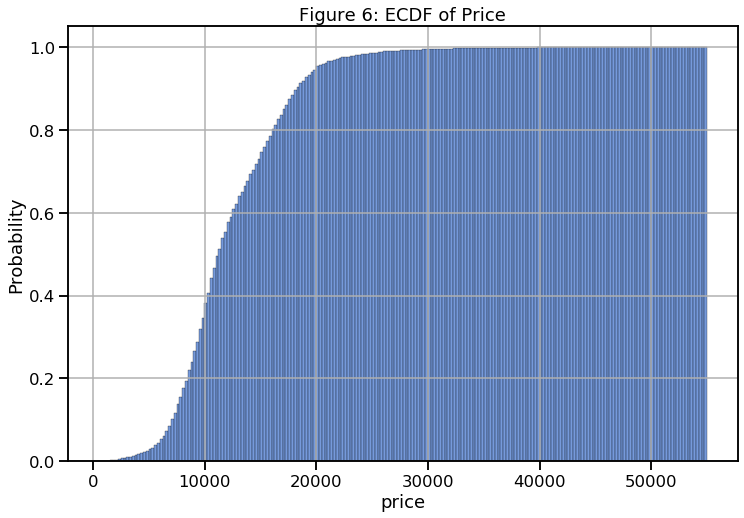

In [82]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='price', binwidth=250, cumulative=True, stat='probability')
plt.grid()
plt.title('Figure 6: ECDF of Price')
plt.show()

Figure 6 represents the empirical cumulative distribution of price of used Ford cars. The graphs shows us the probability of occurence of price at a given point. For example, the probability of the price being less than $10,000 is approximately 0.4.

### Creating boxplot or violinplot (one or more) with the numeric columns